In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# data set https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

In [4]:
raw = pd.read_excel("CCPP/Folds5x2_pp.xlsx")
raw.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


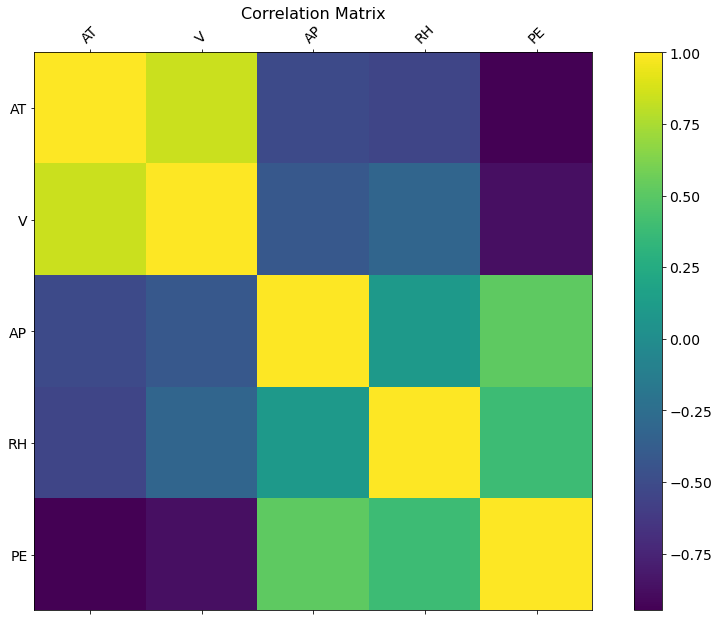

In [7]:
f = plt.figure(figsize=(15, 10))
plt.matshow(raw.corr(), fignum=f.number)
plt.xticks(range(raw.select_dtypes(['number']).shape[1]), raw.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(raw.select_dtypes(['number']).shape[1]), raw.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Attribute Information:
Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

In [9]:
X = raw[['AT', 'V', 'AP', 'RH']]
y = raw['PE']

In [11]:
linear = LinearRegression().fit(X, y)
linear.coef_

array([-1.97751311, -0.23391642,  0.06208294, -0.1580541 ])

Из приведённых данных видно, что температура, вакуум на выхлопе паровой трубы и относительная влажность воздуха отрицательно влияют на выработку электроэнергии. В то время как атмосферное давление влияет положительно. Однако влияние данного параметра минимально в силу самого маленького коэффициента регрессии. Чуть сильнее (в 1,5 раза по модулю больше) влияет относительная влажность воздуха, ещё сильнее вакуум на выхлопе паровой трубы. Самое сильное негативное влияние оказывает температура (в 10 раз больше, чем следующий параметр - давление). Самое сильное влияние температуры логично вследствие наличия значительного количества не только природных, но и социальных факторов. Вместе с повышением температуры воздуха значительно снижаются затраты электроэнергии (наступают теплыё летние времена, увеличивается продолжительность светлого времени суток, когда люди могут использовать естественное освещение, снижаются затраты электроэнергии на отопление, снижается потребность приговлении согревающего питья, тяжёлой, наваристой пищи, часть людей стабильно готовят пищу на костре). Отметим, что в тёплое время года в среднем выше относительная влажность и ниже атмосферное давление. Однако, при одном и том же температурном режиме эти факторы значительно зависят от климатической зоны, высоты над уровнем моря и других аспектов. Поэтому они менее коррелированы с светлым временем года и, как следствие, оказывают меньшее негативное влияние на выработку электроэнергии.

In [12]:
X

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [15]:
linear_score = r2_score(y, linear.predict(X))
ridge = Ridge(alpha=100).fit(X, y)
ridge.coef_

array([-1.9753826 , -0.2347244 ,  0.06261916, -0.15769764])

<BarContainer object of 4 artists>

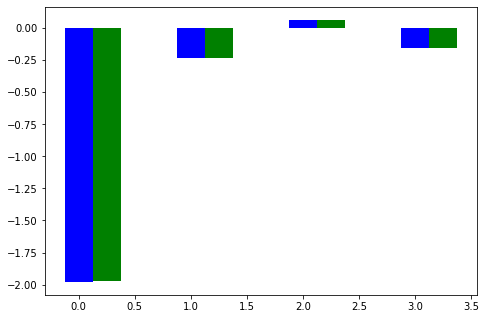

In [16]:
s = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(s + 0.00, linear.coef_, color = 'b', width = 0.25)
ax.bar(s + 0.25, ridge.coef_, color = 'g', width = 0.25)

In [17]:
(ridge.coef_ - linear.coef_) / linear.coef_

array([-0.00107737,  0.00345413,  0.00863707, -0.00225533])

В результате сравнения коэффициентов на основе приведённого графика и подсчёта относительных измений, видно, что относительные изменения коэффициентов в ridge-регрессии по сравнению с линейной незначительные (порядка  10−10 ). Отсюда можно сделать вывод, что модель ridge-регресии с параметром  𝜆=100  очень похожа на линейную.

In [18]:
ridge_score = r2_score(y, ridge.predict(X))
ridge_score

0.9286959447823824

In [19]:
(ridge_score - linear_score) / linear_score

-1.5616504991732645e-07

Относительные изменения  𝑅^2𝑠𝑐𝑜𝑟𝑒  имеют порядок  10−7 . Отсюда можно сделать вывод, что данный показатель не изменился, т.е. точность модели осталась прежней.

In [20]:
data = pd.DataFrame(columns=['lambda', 'R', 'AT', 'V', 'AP', 'RH'])

t = 2**20
for i in range(40):
  ridge = Ridge(alpha=t).fit(X, y) 
  data.loc[i] = [t, r2_score(y, ridge.predict(X))] + list(ridge.coef_)
  t /= 2;

In [21]:
data.sample(3)

,lambda,R,AT,V,AP,RH
35,0.000031,0.928696,-1.977513,-0.233916,0.062083,-0.158054
9,2048.000000,0.928638,-1.935031,-0.250008,0.072720,-0.150941
31,0.000488,0.928696,-1.977513,-0.233916,0.062083,-0.158054


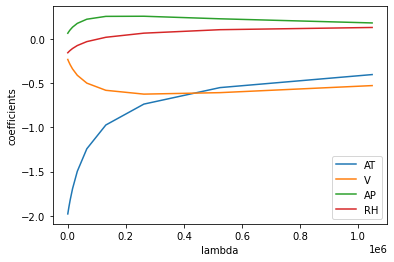

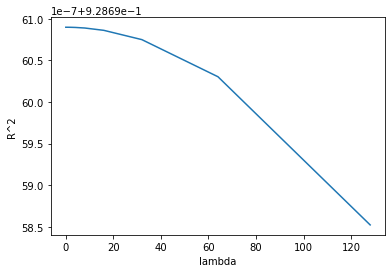

In [22]:
fig, ax = plt.subplots()
plt.plot(data['lambda'], data.AT, label='AT')
plt.plot(data['lambda'], data.V, label='V')
plt.plot(data['lambda'], data.AP, label='AP')
plt.plot(data['lambda'], data.RH, label='RH')
ax.set_xlabel('lambda')
ax.set_ylabel('coefficients')
ax.legend()
plt.show()

fig, ax = plt.subplots()
plt.plot(data.loc[data['lambda'] <= 128, 'lambda'], data.loc[data['lambda'] <= 128, 'R'])
ax.set_xlabel('lambda')
ax.set_ylabel('R^2')
plt.show()

In [24]:
lasso = Lasso(alpha=10).fit(X, y)
lasso.coef_

array([-1.38821843, -0.41900727,  0.        , -0.        ])

<BarContainer object of 4 artists>

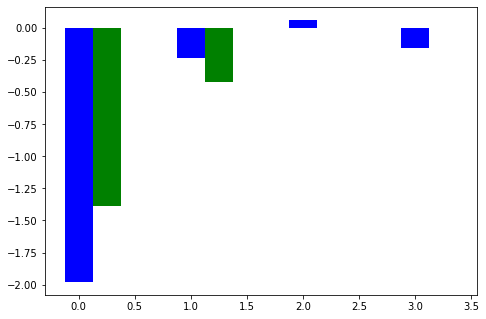

In [25]:
s = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(s + 0.00, linear.coef_, color = 'b', width = 0.25)
ax.bar(s + 0.25, lasso.coef_, color = 'g', width = 0.25)

In [26]:
(lasso.coef_ - linear.coef_) / linear.coef_

array([-0.29799786,  0.79126916, -1.        , -1.        ])

При использовании lasso-регрессии с параметром регуляризации  10  изменения коэффициентов значительны по сравнению с линейной регрессией. Коэффициент, связывающий с температурой уменьшийлся практически на  30% , коэффициент при вакууме на выхлопе паровой трубы вырос на  79% , в то время как коэффициенты при атмосферном давлении и относительной влажности обнулились.

In [27]:
lasso_score = r2_score(y, lasso.predict(X))
lasso_score

0.9081278558696624

In [28]:
(lasso_score - linear_score) / linear_score

-0.022147432478960172

𝑅^2𝑠𝑐𝑜𝑟𝑒  снизилась приблизительно на  2.2  в относительном измерении (в абсолютном выражении упала на  2  процентных пункта). Точность ухудшилась в связи с исключением признаков, хоть и мало коррелированных.

In [29]:
data = pd.DataFrame(columns=['lambda', 'R', 'AT', 'V', 'AP', 'RH'])

t = 2**6
for i in range(80):
  lasso = Lasso(alpha=t).fit(X, y) 
  data.loc[i] = [t, r2_score(y, lasso.predict(X))] + list(lasso.coef_)
  t /= 1.1;
t

0.03124389440319954

In [30]:
data.sample(3)

,lambda,R,AT,V,AP,RH
12,20.392372,0.884097,-1.059467,-0.517387,0.000000,0.000000
24,6.497638,0.919389,-1.600931,-0.354621,0.000000,-0.053567
47,0.725644,0.928578,-1.937663,-0.246956,0.052595,-0.146773


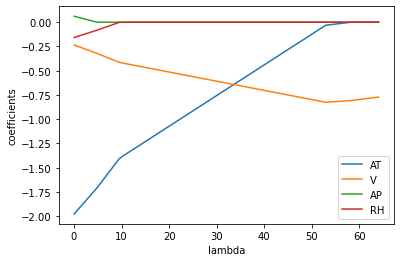

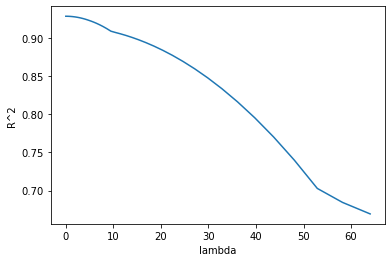

In [31]:
fig, ax = plt.subplots()
plt.plot(data['lambda'], data.AT, label='AT')
plt.plot(data['lambda'], data.V, label='V')
plt.plot(data['lambda'], data.AP, label='AP')
plt.plot(data['lambda'], data.RH, label='RH')
ax.set_xlabel('lambda')
ax.set_ylabel('coefficients')
ax.legend()
plt.show()

fig, ax = plt.subplots()
plt.plot(data['lambda'], data.R)
ax.set_xlabel('lambda')
ax.set_ylabel('R^2')
plt.show()

C ростом параметра регуляризации lasso-регресии все коэффцициенты по очереди зануляются. При параметре регуляризации  10 зануляются коэффициенты, отвечающие за атмосферное давление и относительную влажность, температура обнуляется при  50 . Таким образом, можно сделать вывод о том, что зависимость выработки электричества от атмосферного давления, относительной влажности и температуры имеет сезонный характер. Данные показатели, как правило, демонстрируют течение того или иного времени года, а значит, снижение/повышение потребления электричества и необходимой выработки для этого. Вакуум на выхлопе трубы в свою очередь непосредственно связан с процессом производства электричества, поэтому он и зануляется последним. Также отметим эксоненциальное падение  𝑅^2𝑠𝑐𝑜𝑟𝑒  при росте коэффициента lasso-регуляризации.